# Watson Healthcare Modified Viduals # 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# direct path to csv
direct_path_watson = "Resources/watson_healthcare_modified.csv"

In [16]:
# read csv
watson_raw_data_df = pd.read_csv(direct_path_watson)
watson_raw_data_df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [17]:
departments = watson_raw_data_df["Department"]

In [18]:
watson_raw_data_df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [19]:
attrition_new_df = watson_raw_data_df[["Department", "Attrition", "EducationField", "JobRole", "Gender", "DistanceFromHome", "JobInvolvement", "JobLevel", "JobSatisfaction", "YearsAtCompany", "OverTime"]]
attrition_new_df.head(100)

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
0,Cardiology,No,Life Sciences,Nurse,Female,1,3,2,4,6,Yes
1,Maternity,No,Life Sciences,Other,Male,8,2,2,2,10,No
2,Maternity,Yes,Other,Nurse,Male,2,2,1,3,0,Yes
3,Maternity,No,Life Sciences,Other,Female,3,3,1,3,8,Yes
4,Maternity,No,Medical,Nurse,Male,2,3,1,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...
95,Neurology,No,Technical Degree,Other,Female,2,3,3,3,4,No
96,Cardiology,No,Other,Nurse,Female,3,3,2,3,3,No
97,Cardiology,No,Medical,Nurse,Male,4,3,2,3,5,No
98,Cardiology,No,Medical,Nurse,Male,10,3,4,3,37,No


# Maternity Data #

In [20]:
maternity_df = attrition_new_df[(attrition_new_df["Department"] == "Maternity")]
maternity_df.head()

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
1,Maternity,No,Life Sciences,Other,Male,8,2,2,2,10,No
2,Maternity,Yes,Other,Nurse,Male,2,2,1,3,0,Yes
3,Maternity,No,Life Sciences,Other,Female,3,3,1,3,8,Yes
4,Maternity,No,Medical,Nurse,Male,2,3,1,2,2,No
5,Maternity,No,Life Sciences,Nurse,Male,2,3,1,4,7,No


In [21]:
maternity_df_attrition = maternity_df[(maternity_df["Attrition"] == "Yes")]
maternity_df_attrition                     

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
2,Maternity,Yes,Other,Nurse,Male,2,2,1,3,0,Yes
14,Maternity,Yes,Life Sciences,Nurse,Male,24,2,1,3,4,Yes
26,Maternity,Yes,Life Sciences,Other,Female,16,1,1,1,10,Yes
34,Maternity,Yes,Medical,Other,Male,1,3,1,4,2,Yes
42,Maternity,Yes,Life Sciences,Nurse,Male,25,1,1,3,1,No
...,...,...,...,...,...,...,...,...,...,...,...
1654,Maternity,Yes,Life Sciences,Nurse,Male,3,2,1,4,0,Yes
1655,Maternity,Yes,Life Sciences,Nurse,Female,8,2,1,2,1,No
1661,Maternity,Yes,Life Sciences,Nurse,Female,15,1,1,4,5,Yes
1669,Maternity,Yes,Medical,Nurse,Male,25,2,1,2,2,Yes


In [22]:
maternity_df_educationfield = maternity_df_attrition[(maternity_df_attrition["EducationField"] == "Life Sciences")|(maternity_df_attrition["EducationField"] == "Medical")] 
maternity_df_educationfield

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
14,Maternity,Yes,Life Sciences,Nurse,Male,24,2,1,3,4,Yes
26,Maternity,Yes,Life Sciences,Other,Female,16,1,1,1,10,Yes
34,Maternity,Yes,Medical,Other,Male,1,3,1,4,2,Yes
42,Maternity,Yes,Life Sciences,Nurse,Male,25,1,1,3,1,No
50,Maternity,Yes,Life Sciences,Nurse,Male,1,2,3,3,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1654,Maternity,Yes,Life Sciences,Nurse,Male,3,2,1,4,0,Yes
1655,Maternity,Yes,Life Sciences,Nurse,Female,8,2,1,2,1,No
1661,Maternity,Yes,Life Sciences,Nurse,Female,15,1,1,4,5,Yes
1669,Maternity,Yes,Medical,Nurse,Male,25,2,1,2,2,Yes


In [23]:
maternity_final = maternity_df_educationfield[(maternity_df_educationfield["JobRole"] == "Nurse")]
maternity_final.head()

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
14,Maternity,Yes,Life Sciences,Nurse,Male,24,2,1,3,4,Yes
42,Maternity,Yes,Life Sciences,Nurse,Male,25,1,1,3,1,No
50,Maternity,Yes,Life Sciences,Nurse,Male,1,2,3,3,1,Yes
102,Maternity,Yes,Life Sciences,Nurse,Female,6,2,1,4,1,Yes
111,Maternity,Yes,Life Sciences,Nurse,Male,7,1,2,3,9,Yes


# Total Count of RNs

In [24]:
maternity_final_rn = maternity_final[(maternity_final["JobRole"] == "Nurse")].count()["JobRole"]
maternity_final_rn

48

# Male v Female 

In [25]:
maternity_df_female = maternity_final[(maternity_final["Gender"] == "Female")].count()["Gender"]
maternity_df_female

17

In [26]:
maternity_df_male = maternity_final[(maternity_final["Gender"] == "Male")].count()["Gender"]
maternity_df_male

31

Text(0.5, 1.0, 'Maternity RN Gender Attrition')

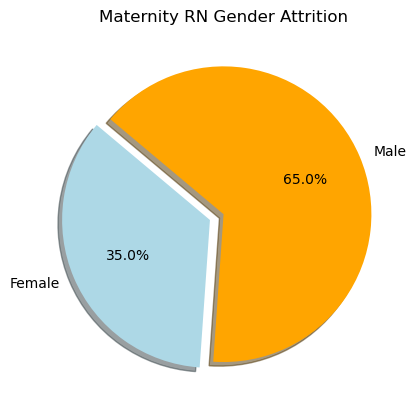

In [124]:
labels = ["Female", "Male"]

gender_breakdown = [35,65]

colors = ["lightblue", "orange"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Maternity RN Gender Attrition")

# Travel Distance from Home

In [96]:
maternity_dfh_short = maternity_final[(maternity_final["DistanceFromHome"] <=7)].count()["DistanceFromHome"]
maternity_dfh_short

24

In [30]:
maternity_dfh_long = maternity_final[(maternity_final["DistanceFromHome"] >=8)].count()["DistanceFromHome"]
maternity_dfh_long

24

Text(0.5, 1.0, 'Maternity RN Travel Distance to Work')

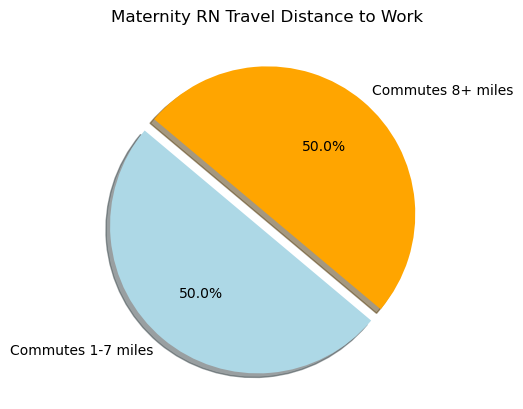

In [123]:
labels = ["Commutes 1-7 miles", "Commutes 8+ miles"]

gender_breakdown = [50,50]

colors = ["lightblue", "orange"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Maternity RN Travel Distance to Work")

# Level of Job Involvement 

In [31]:
maternity_job_involvement_low = maternity_final[(maternity_final["JobInvolvement"] == 1)].count()["JobInvolvement"]
maternity_job_involvement_low

6

In [32]:
maternity_job_involvement_high = maternity_final[(maternity_final["JobInvolvement"] > 1)].count()["JobInvolvement"]
maternity_job_involvement_high

42

Text(0.5, 1.0, 'Maternity RN Job Involvement')

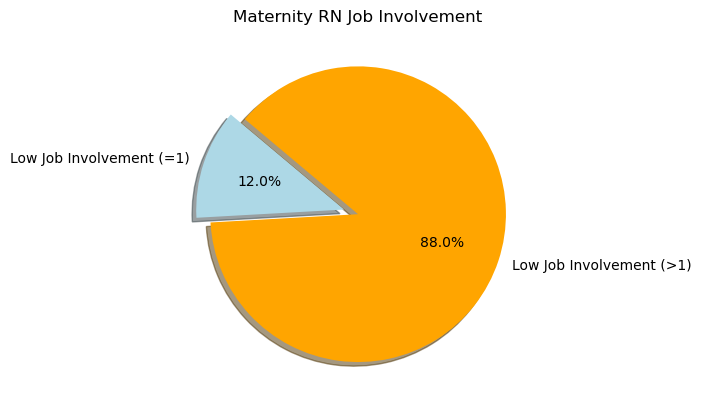

In [122]:
labels = ["Low Job Involvement (=1)", "Low Job Involvement (>1)"]

gender_breakdown = [12,88]

colors = ["lightblue", "orange"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Maternity RN Job Involvement")

# Job Level (1-3)

In [33]:
maternity_job_level_1 = maternity_final[(maternity_final["JobLevel"] == 1)].count()["JobLevel"]
maternity_job_level_1

43

In [34]:
maternity_job_level_2 = maternity_final[(maternity_final["JobLevel"] == 2)].count()["JobLevel"]
maternity_job_level_2

3

In [35]:
maternity_job_level_3 = maternity_final[(maternity_final["JobLevel"] == 3)].count()["JobLevel"]
maternity_job_level_3

2

Text(0, 0.5, 'Total Percentage')

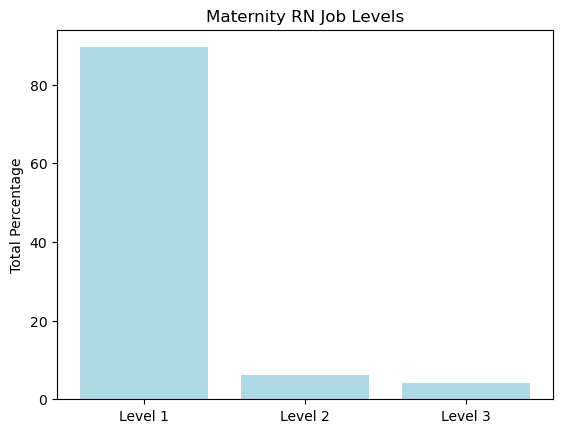

In [125]:
levels = ["Level 1", "Level 2", "Level 3"]
level_percentages = [89.5,6.25,4.25]
x_axis = np.arange(len(level_percentages))

plt.bar(x_axis, level_percentages, color="lightblue", align="center")

tick_locations = [level for level in x_axis]
plt.xticks(tick_locations, levels)


plt.title("Maternity RN Job Levels")
plt.ylabel("Total Percentage")

# Job Satisfaction

In [36]:
maternity_job_satisfaction_low = maternity_final[(maternity_final["JobSatisfaction"] <= 2)].count()["JobSatisfaction"]
maternity_job_satisfaction_low

22

In [37]:
maternity_job_satisfaction_high = maternity_final[(maternity_final["JobSatisfaction"] >= 3)].count()["JobSatisfaction"]
maternity_job_satisfaction_high

26

Text(0.5, 1.0, 'Maternity RN Job Satisfaction')

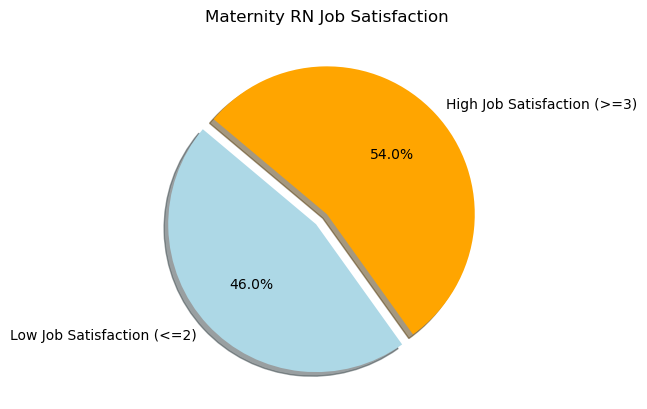

In [126]:
labels = ["Low Job Satisfaction (<=2)", "High Job Satisfaction (>=3)"]

gender_breakdown = [46,54]

colors = ["lightblue", "orange"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Maternity RN Job Satisfaction")

# Tenure

In [38]:
maternity_tenure_low = maternity_final[(maternity_final["YearsAtCompany"] <= 2)].count()["YearsAtCompany"]
maternity_tenure_low

32

In [39]:
maternity_tenure_high = maternity_final[(maternity_final["YearsAtCompany"] >=3)].count()["YearsAtCompany"]
maternity_tenure_high

16

Text(0.5, 1.0, 'Maternity RN Tenure')

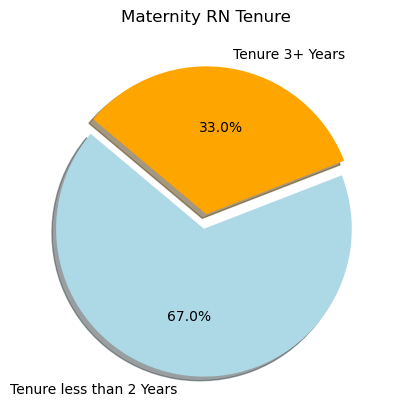

In [130]:
labels = ["Tenure less than 2 Years", "Tenure 3+ Years"]

gender_breakdown = [67,33]

colors = ["lightblue", "orange"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Maternity RN Tenure")

# Overtime

In [40]:
maternity_overtime = maternity_final[(maternity_final["OverTime"] == "Yes")].count()["OverTime"]
maternity_overtime

31

Text(0.5, 1.0, 'Maternity RN Overtime')

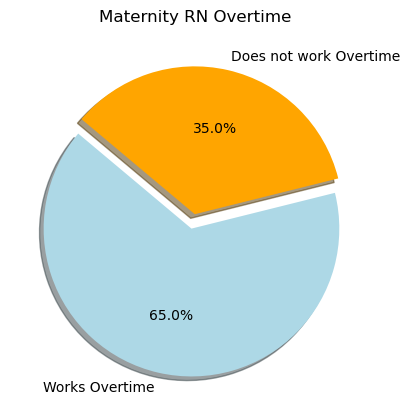

In [133]:
labels = ["Works Overtime", "Does not work Overtime"]

gender_breakdown = [65,35]

colors = ["lightblue", "orange"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Maternity RN Overtime")

# Neurology #

In [41]:
neurology_df = attrition_new_df[(attrition_new_df["Department"] == "Neurology")]
neurology_df.head()

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
22,Neurology,No,Life Sciences,Other,Female,7,3,3,2,12,No
25,Neurology,No,Other,Other,Female,5,3,5,3,14,No
45,Neurology,No,Technical Degree,Other,Female,12,3,5,3,22,No
55,Neurology,No,Life Sciences,Other,Female,1,3,3,4,15,Yes
59,Neurology,No,Life Sciences,Therapist,Male,1,2,2,3,7,No


In [42]:
neurology_df_attrition = neurology_df[(neurology_df["Attrition"] == "Yes")]
neurology_df_attrition.head() 

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
100,Neurology,Yes,Human Resources,Other,Male,6,3,1,1,3,Yes
271,Neurology,Yes,Life Sciences,Other,Male,29,3,3,2,10,Yes
422,Neurology,Yes,Technical Degree,Other,Male,2,2,1,4,1,No
434,Neurology,Yes,Medical,Other,Male,15,3,3,3,7,Yes
439,Neurology,Yes,Human Resources,Other,Female,23,3,3,1,3,Yes


In [43]:
neurology_df_educationfield = neurology_df_attrition[(neurology_df_attrition["EducationField"] == "Life Sciences")|(neurology_df_attrition["EducationField"] == "Medical")] 
neurology_df_educationfield.head()

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
271,Neurology,Yes,Life Sciences,Other,Male,29,3,3,2,10,Yes
434,Neurology,Yes,Medical,Other,Male,15,3,3,3,7,Yes
452,Neurology,Yes,Life Sciences,Other,Female,17,3,1,3,7,Yes
566,Neurology,Yes,Medical,Other,Male,2,3,5,1,5,Yes
1308,Neurology,Yes,Medical,Other,Female,14,3,1,3,0,No


In [44]:
neurology_final = neurology_df_educationfield[(neurology_df_educationfield["JobRole"] == "Nurse")]
neurology_final.head()

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
1350,Neurology,Yes,Life Sciences,Nurse,Male,24,3,1,4,4,No
1651,Neurology,Yes,Life Sciences,Nurse,Male,2,2,1,4,1,No
1656,Neurology,Yes,Life Sciences,Nurse,Female,5,3,1,4,5,Yes
1663,Neurology,Yes,Life Sciences,Nurse,Male,6,4,1,1,0,Yes
1665,Neurology,Yes,Life Sciences,Nurse,Female,10,2,1,3,2,No


In [45]:
neurology_df_RN = neurology_final[(neurology_final["JobRole"] == "Nurse")].count()["JobRole"]
neurology_df_RN

8

In [46]:
neurology_df_female = neurology_final[(neurology_final["Gender"] == "Female")].count()["Gender"]
neurology_df_female

4

In [47]:
neurology_df_male = neurology_final[(neurology_df["Gender"] == "Male")].count()["Gender"]
neurology_df_male

/var/folders/xh/ng1p8msd4q79nym6tw79d_j00000gn/T/ipykernel_5759/847738561.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  neurology_df_male = neurology_final[(neurology_df["Gender"] == "Male")].count()["Gender"]


4

In [48]:
neurology_dfh_short = neurology_final[(neurology_final["DistanceFromHome"] <=7)].count()["DistanceFromHome"]
neurology_dfh_short

5

In [49]:
neurology_dfh_long = neurology_final[(neurology_final["DistanceFromHome"] >=8 )].count()["DistanceFromHome"]
neurology_dfh_long

3

In [50]:
neurology_job_involvement_low = neurology_final[(neurology_final["JobInvolvement"] == 1)].count()["JobInvolvement"]
neurology_job_involvement_low

1

In [51]:
neurology_job_involvement_high = neurology_final[(neurology_final["JobInvolvement"] > 1)].count()["JobInvolvement"]
neurology_job_involvement_high

7

In [52]:
neurology_job_level_1 = neurology_final[(neurology_final["JobLevel"] == 1)].count()["JobLevel"]
neurology_job_level_1

8

In [53]:
neurology_job_level_2 = neurology_final[(neurology_final["JobLevel"] == 2)].count()["JobLevel"]
neurology_job_level_2

0

In [54]:
neurology_job_satisfaction_low = neurology_final[(neurology_final["JobSatisfaction"] <= 2)].count()["JobSatisfaction"]
neurology_job_satisfaction_low

2

In [55]:
neurology_job_satisfaction_high = neurology_final[(neurology_final["JobSatisfaction"] >= 3)].count()["JobSatisfaction"]
neurology_job_satisfaction_high

6

In [56]:
neurology_tenure_low = neurology_final[(neurology_final["YearsAtCompany"] <= 2)].count()["YearsAtCompany"]
neurology_tenure_low

6

In [57]:
neurology_tenure_high = neurology_final[(neurology_final["YearsAtCompany"] >=3)].count()["YearsAtCompany"]
neurology_tenure_high

2

In [58]:
neurology_overtime = neurology_final[(neurology_final["OverTime"] == "Yes")].count()["OverTime"]
neurology_overtime

5

# Cardiology #

In [59]:
cardiology_df = attrition_new_df[(attrition_new_df["Department"] == "Cardiology")]
cardiology_df.head()

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
0,Cardiology,No,Life Sciences,Nurse,Female,1,3,2,4,6,Yes
18,Cardiology,No,Life Sciences,Administrative,Female,2,2,4,4,25,No
21,Cardiology,No,Life Sciences,Other,Male,9,2,1,1,5,No
27,Cardiology,No,Marketing,Nurse,Male,8,3,2,2,9,No
29,Cardiology,No,Marketing,Administrative,Female,2,3,5,1,2,No


In [60]:
cardiology_df_attrition = cardiology_df[(cardiology_df["Attrition"] == "Yes")]
cardiology_df_attrition.head() 

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
36,Cardiology,Yes,Marketing,Other,Male,3,2,1,3,3,Yes
54,Cardiology,Yes,Marketing,Nurse,Female,23,2,2,4,2,Yes
107,Cardiology,Yes,Marketing,Nurse,Male,5,2,2,3,6,Yes
124,Cardiology,Yes,Life Sciences,Nurse,Male,6,1,2,3,7,Yes
127,Cardiology,Yes,Marketing,Other,Male,22,3,1,3,0,Yes


In [61]:
cardiology_df_educationfield = cardiology_df_attrition[(cardiology_df_attrition["EducationField"] == "Life Sciences")|(cardiology_df_attrition["EducationField"] == "Medical")] 
cardiology_df_educationfield.head()

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
124,Cardiology,Yes,Life Sciences,Nurse,Male,6,1,2,3,7,Yes
132,Cardiology,Yes,Life Sciences,Nurse,Female,20,1,2,3,2,Yes
136,Cardiology,Yes,Life Sciences,Therapist,Male,8,1,3,4,4,No
301,Cardiology,Yes,Medical,Other,Female,10,2,1,3,0,No
327,Cardiology,Yes,Medical,Nurse,Female,3,3,2,3,1,Yes


In [62]:
cardiology_final = cardiology_df_educationfield[(cardiology_df_educationfield["JobRole"] == "Nurse")]
cardiology_final.head(25)

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
124,Cardiology,Yes,Life Sciences,Nurse,Male,6,1,2,3,7,Yes
132,Cardiology,Yes,Life Sciences,Nurse,Female,20,1,2,3,2,Yes
327,Cardiology,Yes,Medical,Nurse,Female,3,3,2,3,1,Yes
502,Cardiology,Yes,Life Sciences,Nurse,Female,26,3,2,1,1,No
564,Cardiology,Yes,Life Sciences,Nurse,Female,27,4,2,3,5,Yes
693,Cardiology,Yes,Life Sciences,Nurse,Male,1,2,3,3,14,No
704,Cardiology,Yes,Life Sciences,Nurse,Female,24,4,4,2,1,Yes
745,Cardiology,Yes,Medical,Nurse,Male,29,1,2,1,2,No
833,Cardiology,Yes,Life Sciences,Nurse,Female,23,2,3,1,11,No
944,Cardiology,Yes,Life Sciences,Nurse,Male,5,3,3,2,8,Yes


In [63]:
cardiology_df_RN = cardiology_final[(cardiology_final["JobRole"] == "Nurse")].count()["JobRole"]
cardiology_df_RN

20

In [64]:
cardiology_df_female = cardiology_final[(cardiology_final["Gender"] == "Female")].count()["Gender"]
cardiology_df_female

9

In [65]:
cardiology_df_male = cardiology_final[(cardiology_final["Gender"] == "Male")].count()["Gender"]
cardiology_df_male

11

In [66]:
cardiology_dfh_short = cardiology_final[(cardiology_final["DistanceFromHome"] <=7)].count()["DistanceFromHome"]
cardiology_dfh_short

5

In [67]:
cardiology_dfh_long = cardiology_final[(cardiology_final["DistanceFromHome"] >=8)].count()["DistanceFromHome"]
cardiology_dfh_long

15

In [68]:
cardiology_job_involvement_low = cardiology_final[(cardiology_final["JobInvolvement"] == 1)].count()["JobInvolvement"]
cardiology_job_involvement_low

7

In [69]:
cardiology_job_involvement_high = cardiology_final[(cardiology_final["JobInvolvement"] > 1)].count()["JobInvolvement"]
cardiology_job_involvement_high

13

In [70]:
cardiology_job_level_1 = cardiology_final[(cardiology_final["JobLevel"] == 1)].count()["JobLevel"]
cardiology_job_level_1

0

In [71]:
cardiology_job_level_2 = cardiology_final[(cardiology_final["JobLevel"] == 2)].count()["JobLevel"]
cardiology_job_level_2

12

In [72]:
cardiology_job_level_3 = cardiology_final[(cardiology_final["JobLevel"] == 3)].count()["JobLevel"]
cardiology_job_level_3

6

In [73]:
cardiology_job_level_4 = cardiology_final[(cardiology_final["JobLevel"] == 4)].count()["JobLevel"]
cardiology_job_level_4

2

In [74]:
cardiology_job_satisfaction_low = cardiology_final[(cardiology_final["JobSatisfaction"] <= 2)].count()["JobSatisfaction"]
cardiology_job_satisfaction_low

12

In [75]:
cardiology_job_satisfaction_high = cardiology_final[(cardiology_final["JobSatisfaction"] >= 3)].count()["JobSatisfaction"]
cardiology_job_satisfaction_high

8

In [76]:
cardiology_tenure_low = cardiology_final[(cardiology_final["YearsAtCompany"] <= 2)].count()["YearsAtCompany"]
cardiology_tenure_low

10

In [77]:
cardiology_tenure_high = cardiology_final[(cardiology_final["YearsAtCompany"] >= 3)].count()["YearsAtCompany"]
cardiology_tenure_high

10

In [78]:
cardiology_overtime = cardiology_final[(cardiology_final["OverTime"] == "Yes")].count()["OverTime"]
cardiology_overtime

13